In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

In [2]:
# Load data
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train = datagen.flow_from_directory(r"C:\Users\User\Desktop\PFA\train", target_size=(224, 224), class_mode='binary', batch_size=64)
val = datagen.flow_from_directory(r"C:\Users\User\Desktop\PFA\val", target_size=(224, 224), class_mode='binary', batch_size=64)
test = datagen.flow_from_directory(r"C:\Users\User\Desktop\PFA\test", target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


In [6]:

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [7]:
# Add new top layers for binary classification

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


In [8]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Define the callbacks
log_path = r'C:\Users\User\Desktop\PFA\training____logs.csv'
csv_logger = CSVLogger(log_path, append=True, separator=',')
checkpoint_path = r'C:\Users\User\Desktop\PFA\model_checkpoint.h5'
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=False)

In [11]:
# Train the model
history = model.fit(train, epochs=10, validation_data=val, callbacks=[csv_logger, model_checkpoint])

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.7834 - accuracy: 0.6716

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 400s 7s/step - loss: 0.7834 - accuracy: 0.6716 - val_loss: 0.5389 - val_accuracy: 0.7542
Epoch 2/10
60/60 [==============================] - 518s 9s/step - loss: 0.4953 - accuracy: 0.7647 - val_loss: 0.4900 - val_accuracy: 0.7463
Epoch 3/10
60/60 [==============================] - 605s 10s/step - loss: 0.4589 - accuracy: 0.7807 - val_loss: 0.4335 - val_accuracy: 0.8045
Epoch 4/10
60/60 [==============================] - 823s 14s/step - loss: 0.4089 - accuracy: 0.8100 - val_loss: 0.4086 - val_accuracy: 0.8160
Epoch 5/10
60/60 [==============================] - 899s 15s/step - loss: 0.3788 - accuracy: 0.8325 - val_loss: 0.3785 - val_accuracy: 0.8239
Epoch 6/10
60/60 [==============================] - 902s 15s/step - loss: 0.3175 - accuracy: 0.8656 - val_loss: 0.3543 - val_accuracy: 0.8375
Epoch 7/10
60/60 [==============================] - 914s 15s/step - loss: 0.2859 - accuracy: 0.8899 - val_loss: 0.3346 - val_accuracy: 0.8480
Epoch 8/10
60/60 [=

In [9]:
import pandas as pd
log_data = pd.read_csv(r'C:\Users\User\Desktop\PFA\training____logs.csv', sep=',', engine='python')

In [10]:
# Save the model
model.save(r'C:\Users\User\Desktop\PFA\trained_model.keras')

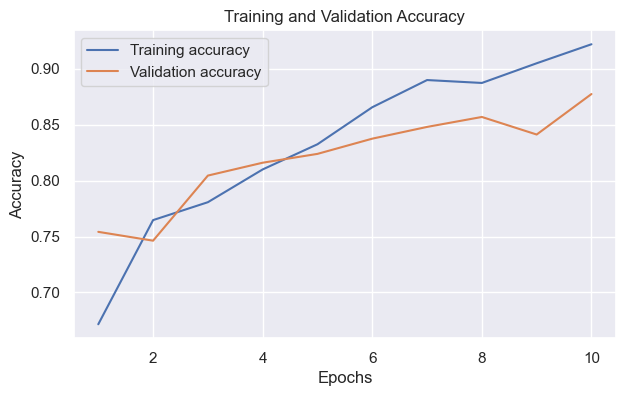

In [23]:
import matplotlib.pyplot as plt

# Assuming you have your training data stored in variables, for example:
accuracy = [0.6716, 0.7647, 0.7807, 0.8100, 0.8325, 0.8656, 0.8899, 0.8873, 0.9049, 0.9219]
val_accuracy = [0.7542, 0.7463, 0.8045, 0.8160, 0.8239, 0.8375, 0.8480, 0.8569, 0.8412, 0.8774]
epochs = range(1, 11)  # Epochs from 1 to 10

# Plot accuracy
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy,  label='Validation accuracy')

# Add title and labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.show()

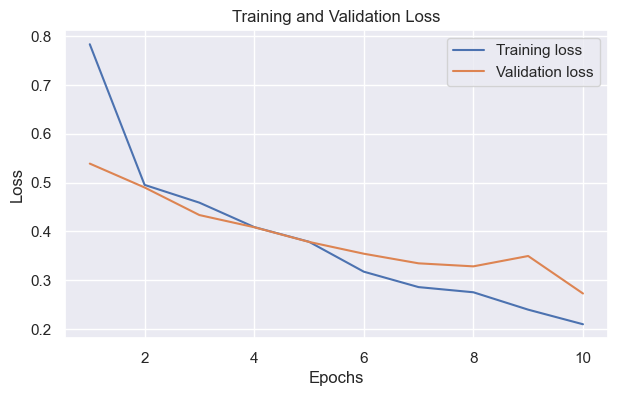

In [25]:
loss = [0.7834, 0.4953, 0.4589, 0.4089, 0.3788, 0.3175, 0.2859, 0.2753, 0.2397, 0.2098]
val_loss = [0.5389, 0.4900, 0.4335, 0.4086, 0.3785, 0.3543, 0.3346, 0.3284, 0.3496, 0.2728]
epochs = range(1, 11)  # Epochs from 1 to 10


plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.show()

In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test)
print(f'Test accuracy: {test_acc}')

30/30 [==============================] - 325s 11s/step - loss: 0.2664 - accuracy: 0.8863
Test accuracy: 0.8862683176994324


In [5]:
from tensorflow.keras.models import load_model

restored_model = load_model(r'C:\Users\User\Desktop\PFA\trained_model.keras')

In [6]:
steps = test.n//test.batch_size
test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = test.next()
    X_test.extend(a) 
    y_test.extend(b)

In [8]:
import numpy as np
X_test, y_test = np.array(X_test), np.array(y_test)

In [9]:
y_pred_prob = restored_model.predict(X_test)

58/58 [==============================] - 346s 6s/step


In [ ]:
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [27]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

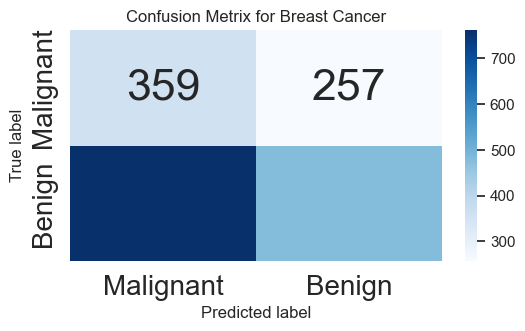

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set(rc={'figure.figsize':(6,3)})

sns.heatmap(confusion_matrix(y_test,y_pred),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

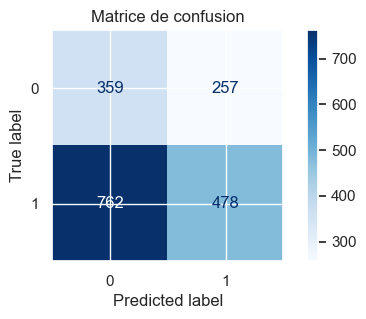

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir les prédictions en classes binaires
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()


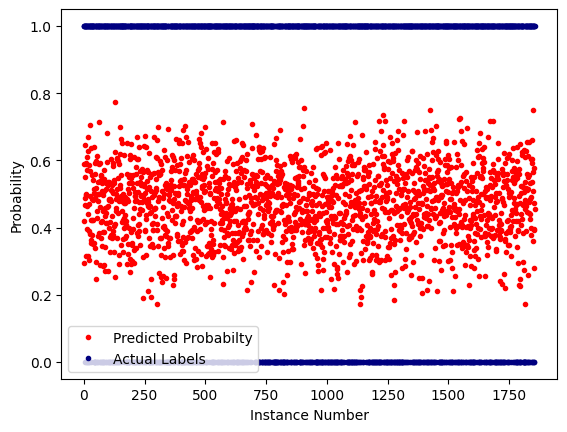

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [35]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

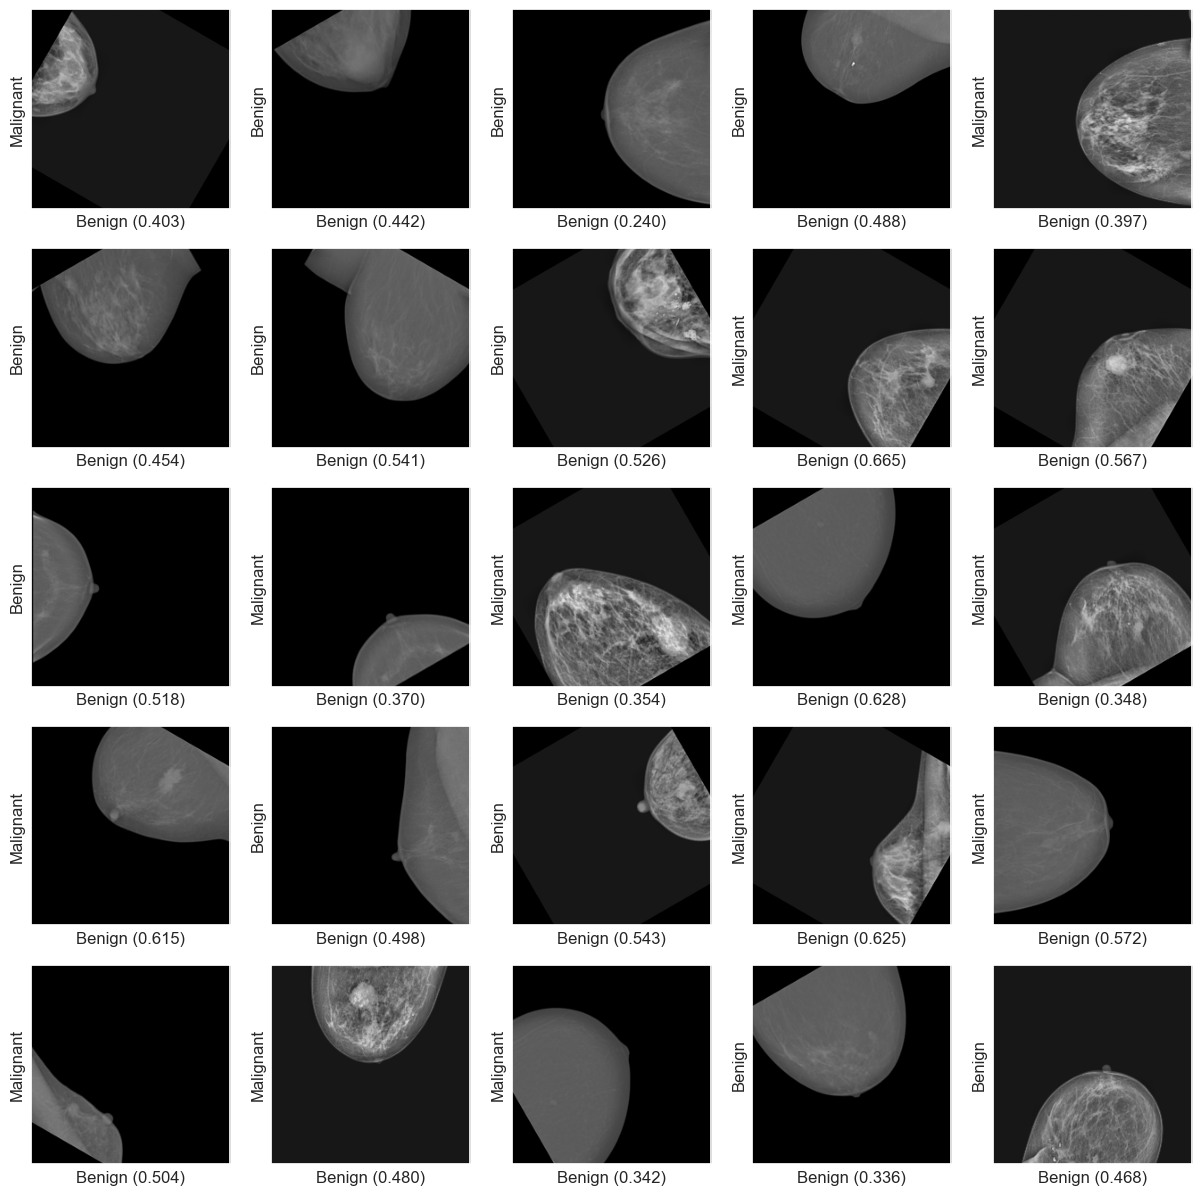

In [37]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))

Predicted probability: 0.6032575964927673


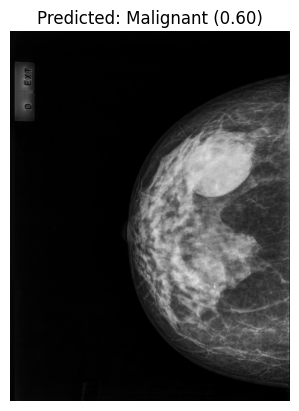

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Function to preprocess the image
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale as in the training
    return img_array

# Load the model
model = load_model(r'C:\Users\User\Desktop\PFA\trained_model.keras')

# Path to the image to be predicted
#img_path = r"C:\Users\User\Desktop\PFA_TEST\Breast Cancer\train\images\Mass-Test_P_00037_RIGHT_MLO_png.rf.857b6096e2afd49a7d398b0a46745330.jpg"  # Change to your image path
#img_path = r"C:\Users\User\Desktop\PFA\test\Benign\20586960 (18).png"
#img_path = r"C:\Users\User\Desktop\Mass-Test_P_00177_LEFT_MLO_png.rf.cb6135a1a4bce42290c929c2e87ef17b.jpg"
#img_path = r"C:\Users\User\Desktop\PFA\train\Benign\20586908 (37).png"
img_path=r"C:\Users\User\Desktop\STU000044_SRS00001_image.png"
#img_path = r"C:\Users\User\Desktop\PFA_TEST\Breast Cancer\train\images\Mass-Test_P_00924_RIGHT_CC_png.rf.13c464155fd645323e5570f23b4cdad1.jpg"

img_array = preprocess_image(img_path, target_size=(224, 224))

# Make prediction (tf.function will be retraced only once)
@tf.function
def predict_image(model, img_array):
    return model(img_array, training=False)

# Call the prediction function
prediction = predict_image(model, img_array)
predicted_prob = prediction.numpy()[0][0]
print(f"Predicted probability: {predicted_prob}")

# Display the image and prediction
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {'Malignant' if predicted_prob > 0.5 else 'Benign'} ({predicted_prob:.2f})")
plt.axis('off')
plt.show()